# Binary Classification with a Software Defects

<b style="color:blue; font-size: 25px">Informations from Kaggle:</b><br>
**Your Goal:** Predict defects in C programs given various various attributes about the code.<br><br>
**Evaluation Metric:** Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.<br><br>

<b style="color:blue; font-size:20px">My Description:</b><br> In this project I will try to predict whether the software defects are present or not. That look like a NLP project. Exact opposite this is a binary classification project. I will use classical machine learning to determine which columns are really related to the dependent varible. I will then use deep learning to predict the defects. Let's get started!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
#Reading Dataset
ss=pd.read_csv("/kaggle/input/playground-series-s3e23/sample_submission.csv")
test=pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")
train=pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")

## EDA - Exploratory Data Analysis

**What is EDA?**<br>
EDA(Exploratory Data Analysis) is a method of data analysis that involves an initial. It helps me to understand the data better.

In [3]:
ss.head()

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5


In [4]:
train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [6]:
train["defects"].astype(int)

0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects, Length: 101763, dtype: int64

In [7]:
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


## Feature Engineering

Here I will use classical machine learning to determine which columns are really related to the dependent varible. But I want to use best model to that step. Here accuracy score can help me to understand which model is better.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=train.drop(["id","defects"],axis=1)
y=train["defects"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
cfr=RandomForestClassifier()
lr=LogisticRegression()
cfr.fit(X_train,y_train)
lr.fit(X_train,y_train)
print(accuracy_score(y_test,cfr.predict(X_test)))
print(accuracy_score(y_test,lr.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.808283791087309
0.786272294010711


**Random Forest Classifier** is better. You can try another models, if you want.

In [9]:
feature_importance = cfr.feature_importances_
columns=X.columns
feature_importance_sorting = sorted(zip(columns, feature_importance), key=lambda x: x[1], reverse=True)
for f, i in feature_importance_sorting:
    print(f"{f}: {i}")

loc: 0.14370861894321935
v: 0.06114326708454463
v(g): 0.05988336203077188
i: 0.05817561697304792
lOCode: 0.05661417015659334
e: 0.05547259699967277
t: 0.05475611635249601
d: 0.05053387252895212
n: 0.04961213374907683
total_Op: 0.04696344906913222
iv(g): 0.046563882983862465
total_Opnd: 0.04526418773513259
branchCount: 0.04066318060525326
uniq_Opnd: 0.03879041191870733
uniq_Op: 0.035567558447290246
lOBlank: 0.03244188320164214
b: 0.03186072024160176
l: 0.030406428278788415
ev(g): 0.03040039288503782
lOComment: 0.022008394260841984
locCodeAndComment: 0.00916975555433497


<p style="font-size:20px">I need to set a threshold value here. I usually set this value to ensure that less than half of the columns remain.</p>

In [10]:
for f, i in feature_importance_sorting:
    if i < 0.05:
        train.drop(f, axis=1, inplace=True)
        test.drop(f, axis=1, inplace=True)
    else:
        continue

In [11]:
cfr=RandomForestClassifier()
model=cfr.fit(X_train,y_train)
print(accuracy_score(y_test,model.predict(X_test)))

0.8085785879231563


In [12]:
X=train.drop(["id","defects"],axis=1)
y=train["defects"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-05-29 15:36:35.421794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 15:36:35.421904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 15:36:35.423829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
model=Sequential()
model.add(Dense(128,activation="relu",))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6798 - loss: 29.3763 - val_accuracy: 0.7891 - val_loss: 0.5135
Epoch 2/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7807 - loss: 0.6344 - val_accuracy: 0.7916 - val_loss: 0.5110
Epoch 3/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7827 - loss: 0.5900 - val_accuracy: 0.7842 - val_loss: 0.5130
Epoch 4/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7828 - loss: 0.5289 - val_accuracy: 0.7882 - val_loss: 0.5116
Epoch 5/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7830 - loss: 0.5373 - val_accuracy: 0.7871 - val_loss: 0.5118
Epoch 6/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7845 - loss: 0.5229 - val_accuracy: 0.7915 - val_loss: 0.5105
Epoch 7/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7861 - loss: 0.5384 - val_accuracy: 0.7916 - val_loss: 0.5100
Epoch 8/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7844 - loss: 0.6805

## Calculating Performance with ROC Curve 

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [17]:
y_probs = model.predict(X_test)

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

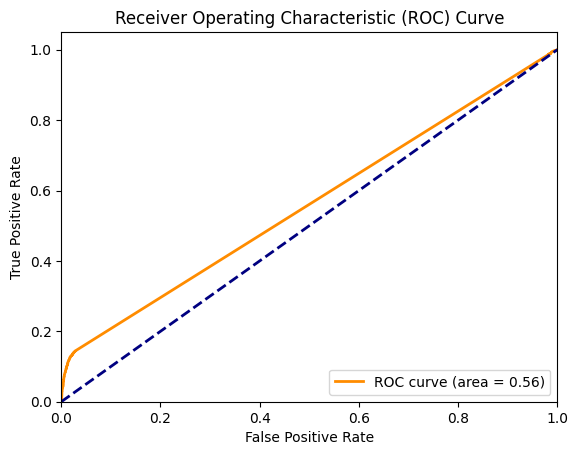

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
ids=test["id"]
test.drop("id",axis=1,inplace=True)
y_pred=model.predict(test)
ss["defects"]=y_pred
ss.to_csv("submission.csv",index=False)

2121/2121 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [21]:
model.save("model.h5")

My ROC curve is ok. But it can be better. Also I think that metrics are not enough to understand the models performance. That's why I will develop a Streamlit application.